<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import tensorflow as tf
import tensorflow_addons as tfa
import bfseg.data.nyu_subsampled
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


import bfseg.models.fast_scnn

Segmentation Models: using `tf.keras` framework.


In [160]:
MODELNAME = 'nyu_to_cla_replay_to_office_2502_replay'

In [161]:
!rclone copy construction:/background_foreground_segmentation_paper/models/pretrained_models_francesco/{MODELNAME}.h5 /home/blumh/Downloads/

In [162]:
from bfseg.utils.models import create_model
from tensorflow import keras

encoder, full_model = create_model(
    model_name="fast_scnn",
    freeze_encoder=False,
    freeze_whole_model=False,
    normalization_type="group",
    image_h=480,
    image_w=640)
model = keras.Model(
    inputs=full_model.input,
    outputs=full_model.output)

model.load_weights('/home/blumh/Downloads/{}.h5'.format(MODELNAME))


Using the following parameters to instantiate the model fast_scnn: {'input_shape': (480, 640, 3), 'num_downsampling_layers': 3, 'num_classes': 2, 'normalization_type': 'group'}.



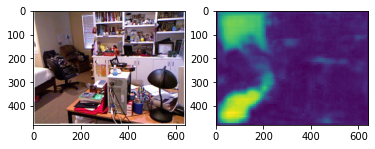

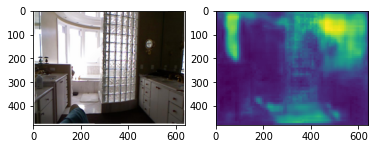

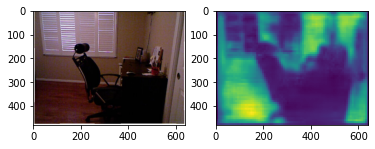

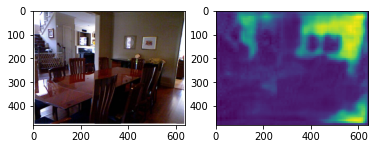

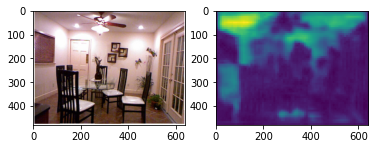

In [163]:
ds = tfds.load('nyu_subsampled', split='full').take(5)
for blob in ds.batch(1):
    pred = model(blob['image'])
    _, axs = plt.subplots(1, 2)
    axs[0].imshow(blob['image'][0])
    axs[1].imshow(pred[0, ..., 1])

In [164]:
!rm -rf /tmp/exported_model
model.save('/tmp/exported_model')

INFO:tensorflow:Assets written to: /tmp/exported_model/assets


INFO:tensorflow:Assets written to: /tmp/exported_model/assets


In [165]:
from shutil import make_archive
make_archive('/tmp/' + MODELNAME, 'zip', '/tmp/exported_model')

'/tmp/nyu_to_cla_replay_to_office_2502_replay.zip'

In [166]:
!rclone copy /tmp/{MODELNAME}.zip construction:/background_foreground_segmentation_paper/models/

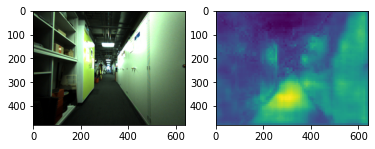

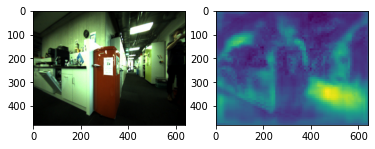

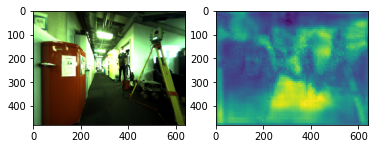

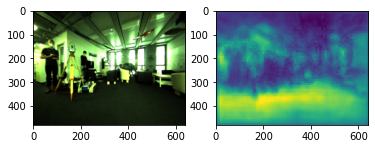

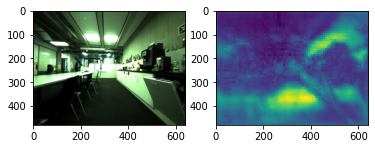

In [110]:
import bfseg.data.hive.office_rumlang_validation_labeled

ds = tfds.load('office_rumlang_validation_labeled', split='OFFICE').take(5)
for blob in ds.batch(1):
    pred = model(blob['image'])
    _, axs = plt.subplots(1, 2)
    axs[0].imshow(blob['image'][0])
    axs[1].imshow(pred[0, ..., 1])

0.1.0
0.1.1
0.1.2
Using /home/blumh/tensorflow_datasets/meshdist_pseudolabels/0.2.0 instead.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/7 [00:00<?, ? splits/s]

Generating rumlang3 examples...: 0 examples [00:00, ? examples/s]

Shuffling meshdist_pseudolabels-rumlang3.tfrecord...:   0%|          | 0/391 [00:00<?, ? examples/s]

Generating rumlang2 examples...: 0 examples [00:00, ? examples/s]

Shuffling meshdist_pseudolabels-rumlang2.tfrecord...:   0%|          | 0/268 [00:00<?, ? examples/s]

Generating garage1 examples...: 0 examples [00:00, ? examples/s]

Shuffling meshdist_pseudolabels-garage1.tfrecord...:   0%|          | 0/857 [00:00<?, ? examples/s]

Generating garage2 examples...: 0 examples [00:00, ? examples/s]

Shuffling meshdist_pseudolabels-garage2.tfrecord...:   0%|          | 0/780 [00:00<?, ? examples/s]

Generating garage3 examples...: 0 examples [00:00, ? examples/s]

Shuffling meshdist_pseudolabels-garage3.tfrecord...:   0%|          | 0/626 [00:00<?, ? examples/s]

Generating office4 examples...: 0 examples [00:00, ? examples/s]

Shuffling meshdist_pseudolabels-office4.tfrecord...:   0%|          | 0/769 [00:00<?, ? examples/s]

Generating office5 examples...: 0 examples [00:00, ? examples/s]

Shuffling meshdist_pseudolabels-office5.tfrecord...:   0%|          | 0/757 [00:00<?, ? examples/s]

Dataset meshdist_pseudolabels downloaded and prepared to /home/blumh/tensorflow_datasets/meshdist_pseudolabels/0.2.0. Subsequent calls will reuse this data.


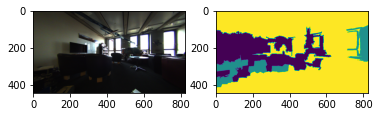

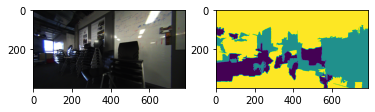

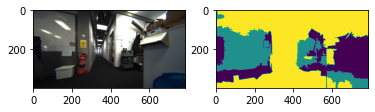

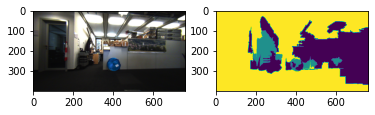

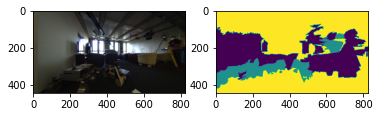

In [60]:
import bfseg.data.pseudolabels

ds = tfds.load('meshdist_pseudolabels', split='office4').take(5)
for blob in ds.batch(1):
    _, axs = plt.subplots(1, 2)
    axs[0].imshow(blob['image'][0])
    axs[1].imshow(blob['label'][0])

/home/blumh/Dropbox/ETH/ASL/sem_seg/projection_node/ws/src/background_foreground_segmentation/py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


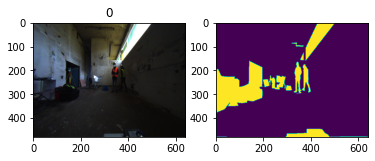

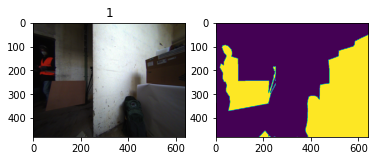

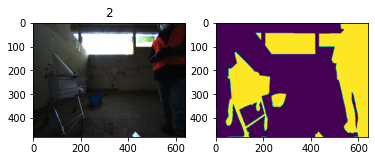

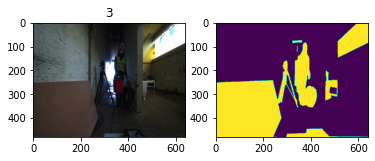

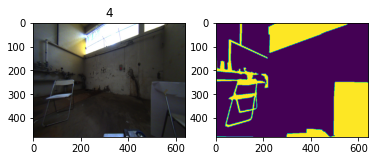

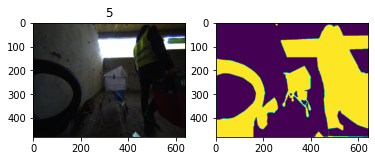

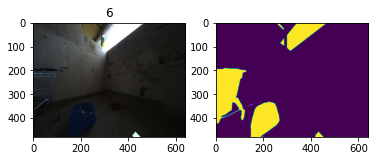

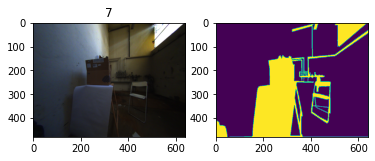

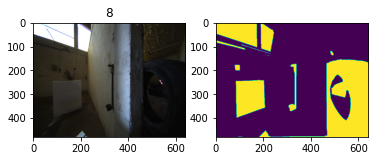

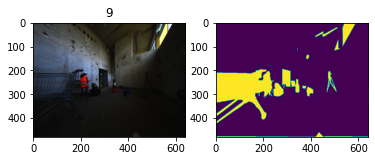

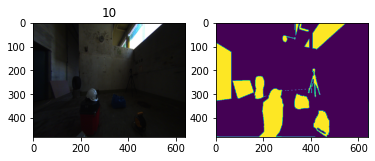

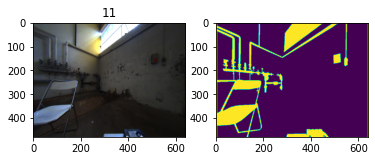

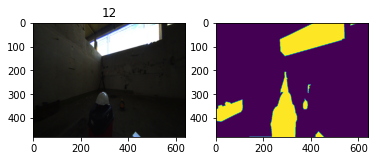

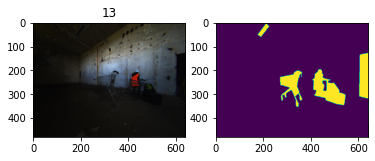

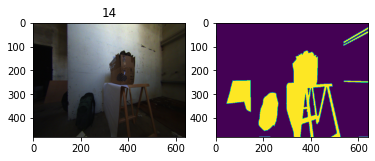

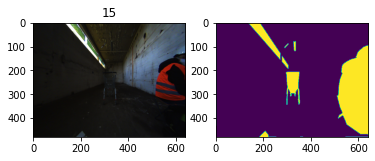

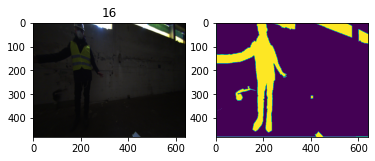

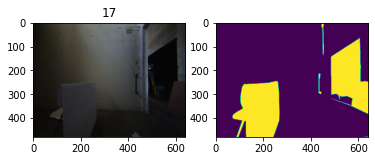

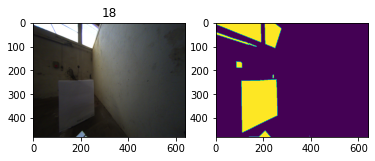

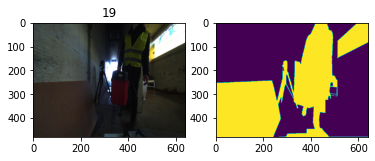

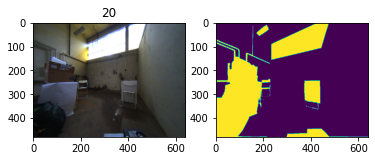

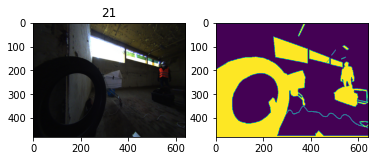

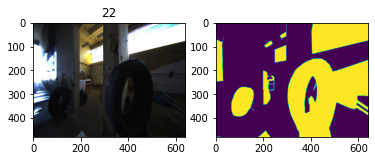

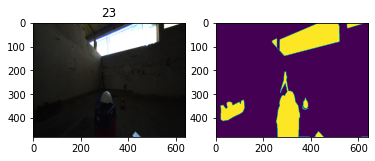

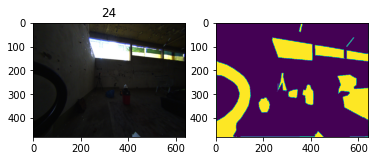

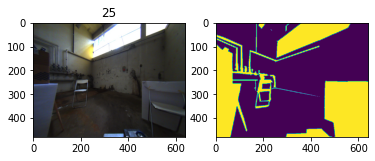

In [88]:
import bfseg.data.hive.office_rumlang_validation_labeled

ds = tfds.load('office_rumlang_validation_labeled', split='RUMLANG')
for i, blob in enumerate(ds.batch(1)):
    _, axs = plt.subplots(1, 2)
    axs[0].imshow(blob['image'][0])
    axs[0].set_title(i)
    axs[1].imshow(1 - blob['label'][0])

In [101]:
import cv2
import numpy as np
blob = next(ds.skip(16).as_numpy_iterator())
cv2.imwrite('/tmp/rgb.png', blob['image'][..., ::-1] * 256)
disp = np.zeros_like(blob['image'])
disp[blob['label'][..., 0] == 0] = [30, 101, 167]
disp[blob['label'][..., 0] == 1] = [25, 46, 91]
cv2.imwrite('/tmp/label.png', disp[..., ::-1])

True